In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('salary.csv')

In [2]:
df

,java,nodejs,reactjs,ruby,android,ios,php,python,c++,golang,angular,level,salary
0,1,0,0,0,0,0,0,0,0,0,0,fresher,"1,000 - 2,000 USD"
1,1,0,1,0,0,0,0,0,0,0,0,fresher,You'll love it
2,1,0,0,0,0,0,0,1,0,0,0,fresher,You'll love it
3,1,0,0,0,0,0,0,0,0,0,0,fresher,"1,000 - 2,500 USD"
4,1,0,0,0,1,0,0,0,0,0,0,fresher,Up to 2.000 $
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0,0,0,0,0,0,0,0,0,0,1,senior,"1,000 - 2,500 USD"
1196,0,0,0,0,0,0,0,0,0,0,1,senior,You'll love it
1197,0,0,0,0,0,0,0,0,0,0,1,senior,You'll love it
1198,0,0,0,0,0,0,0,0,0,0,1,senior,"2,000 - 2,900 USD"


In [3]:
# delete all the rows which is duplicated

df = df.drop_duplicates()

In [4]:
import re

def proccessing(jds):
    result = []
    for i in range(len(jds)):        
        job_description = jds[i][12]
        
        # lower case and delted all trailing whitespace 
    
        job_description = "".join(job_description.split()).lower()
        
        if job_description.find("upto") == 0:
            upto_salry = calculate_unit_salary(job_description.split("upto")[1])
            average = float(upto_salry) / 2
            jds[i][12] = average
            
            result.append(jds[i])
        else:
            range_salary = job_description.split("-")
            
            if len(range_salary) == 2:
                min_salary = calculate_unit_salary(range_salary[0])
                max_salary = calculate_unit_salary(range_salary[1])
                average = (float(min_salary) + float(max_salary)) / 2
                          
                jds[i][12] = average

                
                result.append(jds[i])
        
    return result


def calculate_unit_salary(salary):    
    salary_without_unit = salary.replace("usd", "").replace("$", "").replace(",", "").replace(".", "")
        
    # for in case salary dont pay with USD 
    
    salary_only_number = re.findall('[0-9]+', salary_without_unit)[0]
    
    if len(salary_only_number) != len(salary_without_unit) and len(salary_only_number) == 2:
        salary_without_unit = int(salary_only_number + "000000") * 0.000042
        return salary_without_unit
    if len(salary_only_number) >= 6:
        salary_without_unit = int(salary_only_number) * 0.000042
        return salary_without_unit
    else:
        return salary_only_number

In [5]:
range_salary = proccessing(df.values)

In [6]:
range_salary = np.asarray(range_salary)

In [7]:
df = pd.DataFrame(range_salary, columns = ['java', 'nodejs', 'reactjs', 'ruby', 'android', 'ios', 'php', 'python', 'c++', 'golang', 'angular', 'level', 'average_salary'])


In [8]:
# we have a clean data.

df

,java,nodejs,reactjs,ruby,android,ios,php,python,c++,golang,angular,level,average_salary
0,1,0,0,0,0,0,0,0,0,0,0,fresher,1500.0
1,1,0,0,0,0,0,0,0,0,0,0,fresher,1750.0
2,1,0,0,0,1,0,0,0,0,0,0,fresher,1000.0
3,1,0,0,0,0,0,0,0,0,0,0,fresher,1500.0
4,1,0,0,0,0,0,0,0,0,0,1,fresher,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,0,0,0,0,0,0,0,0,0,0,1,senior,2000.0
373,0,0,0,0,0,0,0,0,0,0,1,senior,1680.0
374,0,0,0,0,0,0,0,0,0,0,1,senior,3000.0
375,0,0,0,0,0,0,0,0,0,0,1,senior,1750.0


In [9]:
df[df["java"] == 1]["average_salary"]

0      1500.0
1      1750.0
2      1000.0
3      1500.0
4      1500.0
        ...  
326    1750.0
341    1350.0
352    1600.0
354    2300.0
358    2300.0
Name: average_salary, Length: 129, dtype: object

In [10]:

java_fresher = df[df["java"] == 1]["average_salary"].mean()
node_fresher = df[df["nodejs"] == 1]["average_salary"].mean()
react_fresher = df[df["reactjs"] == 1]["average_salary"].mean()
ruby_fresher = df[df["ruby"] == 1]["average_salary"].mean()
android_fresher = df[df["android"] == 1]["average_salary"].mean()
ios_fresher = df[df["ios"] == 1]["average_salary"].mean()
php_fresher = df[df["php"] == 1]["average_salary"].mean()
python_fresher = df[df["python"] == 1]["average_salary"].mean()
c_fresher = df[df["c++"] == 1]["average_salary"].mean()
golang_fresher = df[df["golang"] == 1]["average_salary"].mean()
angular_fresher = df[df["angular"] == 1]["average_salary"].mean()

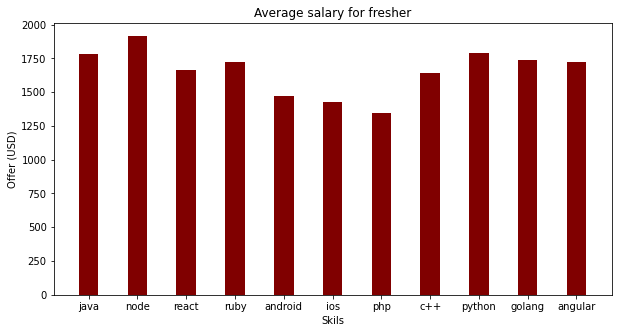

In [11]:
# Average salary for fresher
data = {'java': java_fresher, 'node': node_fresher, 'react': react_fresher,
        'ruby': ruby_fresher, 'android': android_fresher, 'ios': ios_fresher, 'php': php_fresher, "c++": c_fresher,
       'python': python_fresher, 'golang': golang_fresher, 'angular': angular_fresher }
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))

 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Skils")
plt.ylabel("Offer (USD)")
plt.title("Average salary for fresher")
plt.show()

In [12]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
df[["java", "nodejs"]]

,java,nodejs
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
372,0,0
373,0,0
374,0,0
375,0,0


In [ ]:
df[['java', 'nodejs', 'reactjs', 'ruby', 'android', 'ios', 'php', 'python', 'golang', 'angular']]

,java,nodejs,reactjs,ruby,android,ios,php,python,golang,angular
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
372,0,0,0,0,0,0,0,0,0,1
373,0,0,0,0,0,0,0,0,0,1
374,0,0,0,0,0,0,0,0,0,1
375,0,0,0,0,0,0,0,0,0,1


In [ ]:
x = df[['java', 'nodejs', 'reactjs', 'ruby', 'android', 'ios', 'php', 'python', 'c++', 'golang', 'angular']]
y = df[["average_salary"]]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


def predict_model(x, y):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

    mlr = LinearRegression()  
    mlr.fit(x_train, y_train)

    print("Intercept: ", mlr.intercept_)
    print("Coefficients:", mlr.coef_)


In [ ]:
x =  predict_model(x, y)

Intercept:  [1467.49238801]
Coefficients: [[ 240.88917388  342.30430296  134.18099641  220.1368476  -194.610438
    52.1545081  -181.68988268  278.80865393   96.16982494  163.67663735
    63.4684483 ]]


In [ ]:
def predict_specific_salary_base(java, node, react, ruby, android, ios, php, python, golang, angular):
    return 1467.49238801 
    + (240.88917388)*java 
    + (342.30430296)*node
    + (134.18099641)*react 
    + (220.1368476)*ruby 
    + (-194.610438)*android 
    + (52.1545081)*ios 
    + (-181.68988268)*php
    + (278.80865393)*python 
    + (96.16982494)*golang 
    + (96.16982494)*angular

In [ ]:
# Sinh vien biet java, php, react
predict_specific_salary_base(1, 0, 1, 0, 0, 0, 1, 0, 0, 0)

1467.49238801

In [15]:
java_fresher = df[df["java"] == 1]["Total_Salary"].sum()
node_fresher = df[df["nodejs"] == 1]["Total_Salary"].sum()
react_fresher = df[df["reactjs"] == 1]["Total_Salary"].sum()
ruby_fresher = df[df["ruby"] == 1]["Total_Salary"].sum()
android_fresher = df[df["android"] == 1]["Total_Salary"].sum()
ios_fresher = df[df["ios"] == 1]["Total_Salary"].sum()
php_fresher = df[df["php"] == 1]["Total_Salary"].sum()
python_fresher = df[df["python"] == 1]["Total_Salary"].sum()
c_fresher = df[df["c++"] == 1]["Total_Salary"].sum()
golang_fresher = df[df["golang"] == 1]["Total_Salary"].sum()
angular_fresher = df[df["angular"] == 1]["Total_Salary"].sum()
java_fresher

230230.0

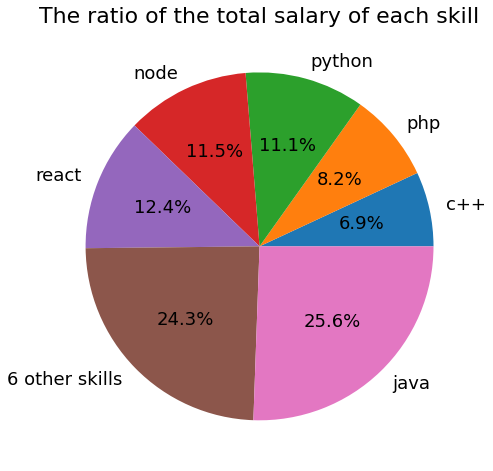

In [64]:
data = {'java': java_fresher, 'node': node_fresher, 'react': react_fresher,
        'ruby': ruby_fresher, 'android': android_fresher, 'ios': ios_fresher, 'php': php_fresher, "c++": c_fresher,
       'python': python_fresher, 'golang': golang_fresher, 'angular': angular_fresher }
Total_Salaries = {'Skill':data.keys(),'Total Salary' : data.values()}
df = pd.DataFrame(Total_Salaries)
df
bn = df.groupby('Skill')['Total Salary'].sum()
bn
ratio = bn.sort_values()
temp = pd.Series([ratio.head(6).sum()],index = ['6 other skills'])
ratio = ratio.add(temp, fill_value=0)
ratio = ratio.sort_values().tail(7)

ax = ratio.plot.pie(figsize=(8, 8),autopct='%1.1f%%',title ='asd',fontsize = 18)
ax.set_ylabel('');
ax.set_title('The ratio of the total salary of each skill',fontsize =22);
